# Library Import

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import numpy as np
import matplotlib.pyplot as plt

import os
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit


import gvar as gv



import correlatoranalyser as CA

In [2]:
#paths for the coarse lattice - new_dataset
p3fold = os.environ['mount_point_path_newdataset'] + "48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom//3PointCorrelation/"
p2fold = os.environ['mount_point_path_newdataset'] + "48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom/2PointCorrelation/"

# coarse lattice - P = -2
opAnalyzer = moments_toolkit(p3fold, p2fold,
                            skip3p=False, skipop=False,
                            verbose=True,
                            fast_data_folder = "../fast_data_newdataset_p-2",
                            operator_folder= "../operator_database",
                            momentum='PX-2_PY-2_PZ-2',
                            insertion_momentum = 'qx0_qy0_qz0',
                            tag_2p='hspectrum',
                            max_n=2, #max_n=3
                            maxConf=3
                            )


Initializing the moments_toolkit class instance...


Initializing the building block class instance...


Reading the the keys of the dataset ...



OSError: Unable to synchronously open file (bad object header version number)

In [4]:
p3fold

'/wsgjsc/home/taggi1/workspace_folders/taggi1_mountpoint/48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom//3PointCorrelation/'

In [5]:
os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW_extended/3PointCorrelation/"

'/wsgjsc/home/taggi1/workspace_folders/jusuf_mountpoint/48c48/binned_1012_hmz370_BMW_extended/3PointCorrelation/'

In [2]:
from pathlib import Path #to read the file's names
import h5py as h5 #to read the correlator


In [5]:
##### read everything (for 2p)

#folder with all the data
#basefolder = os.environ['mount_point_path_newdataset'] + "48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom/2PointCorrelation/"
basefolder = os.environ['mount_point_path_newdataset'] + "tmp_stuff/"


#Path file to the data folder
p = Path(basefolder).glob('**/*')
files = [x for x in p if x.is_file()]

#number of data files (i.e. the number of gauge configurations, and for each the 2point correlator is computed)
nconf = len(files)

#Time extent of the lattice
T = 48

#array with all the 2 point correlators
corr_2p = np.empty((nconf,T),dtype=complex) # shape = (n of config, Time extent)


#we cycle through the files in the folder
for i,file in enumerate(files):

    #we grep the id of the configuration from the file name
    configID = file.name.split('.')[1]
    #configID

    #the file structure is
    #cfgid = "cfg" + str(configID)
    #tag = "hspectrum"
    #smearing = "GN3x100-GN3x100" #also "GN3x60-P" is possible
    #mass = "mq-0.05294" #light quark mass
    #hadron = "proton_3" #also "pion_1" is possible
    #momentum = "PX0_PY0_PZ0" #hadron momentum - it is 0 in this case (can we look also at non 0 momentum ?)

    #f"{cfgid}/{tag}/{smearing}/{mass}/{hadron}/{momentum}"

    #we open the file
    with h5.File(basefolder+file.name, 'r') as h5f:

        #we read the names of the keys making up the file structure

        cfgid_list = list(h5f.keys()) #always a list with only one element
        #cfgid_list
        cfgid = cfgid_list[0] # = 'cfg090211_044614' (or smth like that)

        tag_list = list(h5f[cfgid]) # = ['hspectrum','hspectrum_d2_dpx2','hspectrum_d2_dpy2','hspectrum_d2_dpz2','hspectrum_d_dpx','hspectrum_d_dpy','hspectrum_d_dpz'] (or smth like that)
        #tag_list 
        tag = tag_list[0] #we choose "hspectrum"

        smearing_list = list(h5f[cfgid][tag]) # = ['GN3x60-GN3x60', 'GN3x60-P'] (or smth like that)
        #smearing_list 
        smearing = smearing_list[0] #we choose both source and sink smeared

        mass_list = list(h5f[cfgid][tag][smearing])
        #mass_list
        mass = mass_list[0] #we choose one value of the mass

        hadron_list = list(h5f[cfgid][tag][smearing][mass]) #that's a long list with various hadrons
        #hadron_list
        hadron = 'proton_3' #we choose to look at the proton

        momentum_list = list(h5f[cfgid][tag][smearing][mass][hadron]) #this is also a long list
        #momentum_list
        momentum = 'PX-2_PY-2_PZ-2' #we choose zero forward momentum

        #now that we have the keys we can read the correlator and store it in a np array

        #corr_2p[i] = h5f[cfgid][tag][smearing][mass][hadron][momentum]
        corr_2p[i] = h5f[f"{cfgid}/{tag}/{smearing}/{mass}/{hadron}/{momentum}"][()]

        #np.size(h5f[cfgid][tag][smearing][mass][hadron][momentum])

In [12]:
np.arange(len(corr_2p[0]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

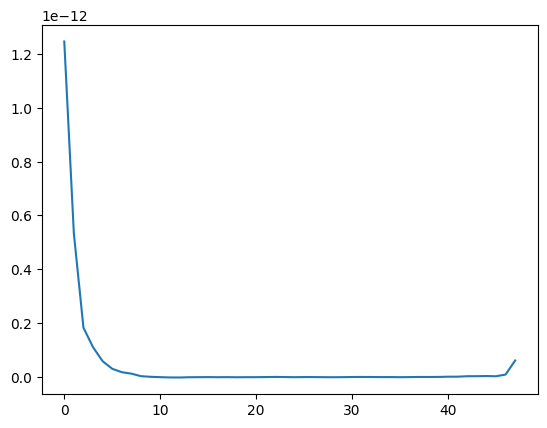

In [16]:
plt.plot(np.arange(len(corr_2p[0])),corr_2p[0].real)

In [17]:
##### read everything (for 3p)

#folder with all the data
basefolder = os.environ['mount_point_path_newdataset'] + "48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom/3PointCorrelation/T10/"

#Path file to the data folder
p = Path(basefolder).glob('**/*')
files = [x for x in p if x.is_file()]

#number of data files (i.e. the number of gauge configurations, and for each the 2point correlator is computed)
nconf = len(files)

#Time extent of the lattice
#sep_T = 8
sep_T = 10

#array with all the 2 point correlators
corr_3p = np.empty((nconf,sep_T+1),dtype=complex) # shape = (n of config, Time extent)

corr_n = 0


#we cycle through the files in the folder
for i,file in enumerate(files):

    #f"{cfgid}/{tag}/{smearing}/{mass}/{hadron}/{momentum}"

    try:

        #we open the file
        with h5.File(basefolder+file.name, 'r') as h5f:

            #we read the names of the keys making up the file structure

            cfgid_list = list(h5f.keys()) #always a list with only one element
            #cfgid_list
            cfgid = cfgid_list[0] # = 'cfg090211_044614' (or smth like that)

            tag_list = list(h5f[cfgid]) # = ['bb','bb_d2_dpx2','bb_d2_dpy2','bb_d2_dpz2','bb_d_dpx','bb_d_dpy',....] (or smth like that)
            #tag_list 
            tag = tag_list[0] #we choose "bb"

            smearing_list = list(h5f[cfgid][tag]) # = ['GN3x60-GN3x60'] (or smth like that)
            #smearing_list 
            smearing = smearing_list[0] #we choose both source and sink smeared

            mass_list = list(h5f[cfgid][tag][smearing])
            #mass_list
            mass = mass_list[0] #we choose one value of the mass

            
            hadron_list = list(h5f[cfgid][tag][smearing][mass]) #that's a list with various hadrons, here smth like ['proton_3', 'proton_negpar_3']
            #hadron_list
            hadron = 'proton_3' #we choose to look at the proton

            qcontent_list = list(h5f[cfgid][tag][smearing][mass][hadron]) # = ['D', 'U'] this is the quark content of the hadron
            #qcontent_list
            qcontent = 'D' #we choose D
            

            momentum_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent]) # = ['PX-2_PY0_PZ0_T8', 'PX0_PY0_PZ0_T8'] that is the list with the available momenta
            #momentum_list
            momentum = momentum_list[0] #we choose zero forward momentum

            displacement_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum]) #that is the list with the available types of displacements
            #displacement_list
            displacement = 'l2_Tx' #we choose the one with 2 gauge links (l2), the first being positive along T, the second being negative along x

            dstructure_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum][displacement]) #available dirac structures
            #dstructure_list
            dstructure = 'g0' #we choose gamma0 here (!!! must be chosen correctly for V,A and T structures)

            insmomementum_list = list(h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum][displacement][dstructure]) #the momentum of the insertion = ['qx0_qy0_qz0'], that is we only have them in the forward limit
            #insmomementum_list
            insmomentum = insmomementum_list[0]


            #now that we have the keys we can read the correlator and store it in a np array

            corr_3p[i] = h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum][displacement][dstructure][insmomentum]

            if i==0:
                np.shape(h5f[cfgid][tag][smearing][mass][hadron][qcontent][momentum][displacement][dstructure][insmomentum])
                break

    except OSError:
        corr_n += 1
        print(f"File corrotto: {file.name}")

corr_n

File corrotto: bb.090129_052322.T10.h5
File corrotto: bb.090215_003622.T10.h5
File corrotto: bb.090125_194828.T10.h5
File corrotto: bb.090125_053044.T10.h5
File corrotto: bb.090124_063014.T10.h5
File corrotto: bb.090125_015753.T10.h5
File corrotto: bb.090211_071912.T10.h5
File corrotto: bb.090120_215332.T10.h5
File corrotto: bb.090126_095442.T10.h5
File corrotto: bb.090124_012323.T10.h5
File corrotto: bb.090123_055943.T10.h5
File corrotto: bb.090202_004357.T10.h5
File corrotto: bb.090127_175111.T10.h5
File corrotto: bb.090125_040627.T10.h5
File corrotto: bb.090117_171617.T10.h5
File corrotto: bb.090215_081729.T10.h5
File corrotto: bb.090129_175403.T10.h5
File corrotto: bb.090127_002555.T10.h5
File corrotto: bb.090210_201752.T10.h5
File corrotto: bb.090207_143417.T10.h5
File corrotto: bb.090201_115145.T10.h5
File corrotto: bb.090201_072516.T10.h5
File corrotto: bb.090206_072150.T10.h5
File corrotto: bb.090207_222228.T10.h5
File corrotto: bb.090128_025956.T10.h5
File corrotto: bb.090212_

212

In [3]:
#folder with all the data
#basefolder = os.environ['mount_point_path_newdataset'] + "48c48/binned20250430_hmz370_BMW_3.31_48c48_ml-0.09933_mh-0.04_connected_himom/3PointCorrelation/T10/"
basefolder = os.environ['mount_point_path_newdataset'] + "tmp_stuff/"

#Path file to the data folder
p = Path(basefolder).glob('**/*')
files = [x for x in p if x.is_file()]
files

#number of data files (i.e. the number of gauge configurations, and for each the 2point correlator is computed)
nconf = len(files)

#Time extent of the lattice
#sep_T = 8
sep_T = 10

#array with all the 2 point correlators
corr_3p = np.empty((nconf,sep_T+1),dtype=complex) # shape = (n of config, Time extent)



i=0
file = files[i]
file.name

#we open the file
with h5.File(basefolder+file.name, 'r') as h5f:

    h5f.keys()


[PosixPath('/wsgjsc/home/taggi1/workspace_folders/taggi1_mountpoint/tmp_stuff/hadspec.090116_023109.h5')]

'hadspec.090116_023109.h5'

<KeysViewHDF5 ['cfg090116_023109']>